### Instalación de librerías.
Instalación de librería fastparquet para lectura de archivos de extensión parquet.

In [60]:
%pip install fastparquet
%pip install openpyxl


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: C:\Users\D&C\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: C:\Users\D&C\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Librerías.

In [61]:
# Para trabajar con dataframes.
import pandas as pd
from pandas.io.formats.excel import ExcelFormatter 
# Para la creación de gráficas.
import seaborn as sns
import matplotlib.pyplot as plt
# Para verificar la existencia de archivos.
import os.path

### Lectura y conversión de archivos a dataframe.

In [62]:
# Convertir archivos a dataframes.
def convert_to_df(file_path):
    try:
        # Leer archivo y pasarlo a dataframe. Usar read_csv o read_parquet dependiendo de la extensión del archivo.
        df = pd.read_csv(file_path) if "csv" in file_path else pd.read_parquet(file_path)
    except:
        # Imprimir mensaje de error dependiendo de la extensión del archivo.
        print("Error: El archivo '{}' no se pudo convertir a dataframe ya que está vacío".format(file_path))
    else:
        # Imprimir mensaje de éxito.
        print("El archivo '{}' fue convertido con éxito.".format(file_path))
        # Devolver dataframe.
        return df

# Revisar que el archivo exista.
def file_check(file_path):
    error_msg = "Error: No se encontró el archivo '{}'. Por favor, revise que el archivo exista y/o que tenga el nombre adecuado.".format(file_path)
    # Llamar a la función convert_to_df con el nombre del archivo si el archivo existe, de lo contrario imprimir mensaje de error.
    return convert_to_df(file_path) if os.path.exists(file_path) is True else print(error_msg)

# Obtener dataframes a partir de los archivos.
prod_df = file_check("files/productos.csv")
v2023_df = file_check("files/ventas_2023.parquet")
v2024_df = file_check("files/ventas_2024.parquet")

El archivo 'files/productos.csv' fue convertido con éxito.
El archivo 'files/ventas_2023.parquet' fue convertido con éxito.
El archivo 'files/ventas_2024.parquet' fue convertido con éxito.


### Esquema y vista previa de los dataframes.

In [63]:
# Esquema.
prod_df.info()
# Vista previa.
prod_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   producto_id  5 non-null      int64 
 1   nombre       5 non-null      object
 2   categoria    5 non-null      object
 3   precio       5 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 292.0+ bytes


,producto_id,nombre,categoria,precio
0,1,Producto A,Electronica,100
1,2,Producto B,Electronica,150
2,3,Producto C,Ropa,50
3,4,Producto D,Ropa,80
4,5,Producto E,Hogar,120


In [64]:
# Esquema.
v2023_df.info()
# Vista previa.
v2023_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   venta_id     5 non-null      int64 
 1   producto_id  5 non-null      int64 
 2   cantidad     5 non-null      int64 
 3   fecha_venta  5 non-null      object
dtypes: int64(3), object(1)
memory usage: 292.0+ bytes


,venta_id,producto_id,cantidad,fecha_venta
0,101,1,10,2023-01-10
1,102,2,5,2023-02-15
2,103,3,8,2023-03-20
3,104,4,3,2023-04-25
4,105,5,7,2023-05-30


In [65]:
# Esquema.
v2024_df.info()
# Vista previa.
v2024_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   venta_id     5 non-null      int64 
 1   producto_id  5 non-null      int64 
 2   cantidad     5 non-null      int64 
 3   fecha_venta  5 non-null      object
dtypes: int64(3), object(1)
memory usage: 292.0+ bytes


,venta_id,producto_id,cantidad,fecha_venta
0,201,1,6,2024-01-12
1,202,2,4,2024-02-18
2,203,3,9,2024-03-22
3,204,4,2,2024-04-28
4,205,5,8,2024-05-31


### Combinar datos de ventas

In [66]:
# Concatenar dataframes.
ventas_df = pd.concat([v2023_df, v2024_df])
# Validar que no haya valores duplicados.
print(ventas_df.duplicated())

0    False
1    False
2    False
3    False
4    False
0    False
1    False
2    False
3    False
4    False
dtype: bool


In [67]:
# Almacenar el número de filas de los dataframes de ventas en variables para auditoría.
f_ventas_df = ventas_df.shape[0]
f_v2023_df = v2023_df.shape[0]
f_v2024_df = v2024_df.shape[0]
# Imprimir la cantidad de filas en la tabla combinada vs. las tablas por separado.
print("\nFilas en la tabla combinada: {}\nFilas en las tablas anteriores: {} en ventas_2023 y {} en ventas_2024."
      .format(f_ventas_df, f_v2023_df, f_v2024_df))
# Imprimir dataframe combinado.
ventas_df


Filas en la tabla combinada: 10
Filas en las tablas anteriores: 5 en ventas_2023 y 5 en ventas_2024.


,venta_id,producto_id,cantidad,fecha_venta
0,101,1,10,2023-01-10
1,102,2,5,2023-02-15
2,103,3,8,2023-03-20
3,104,4,3,2023-04-25
4,105,5,7,2023-05-30
0,201,1,6,2024-01-12
1,202,2,4,2024-02-18
2,203,3,9,2024-03-22
3,204,4,2,2024-04-28
4,205,5,8,2024-05-31


### Eliminar columnas innecesarias.

In [68]:
# Crear variable para almacenar el log de la columna eliminada.
del_log = None

In [69]:
# Revisar si una columna existe o no en un dataframe.
def check_for_column(dataframe, column):
    try:
        # Buscar la columna en el dataframe.
        dataframe[column]
    except KeyError:
        # Regresar Falso si hay un error.
        return False
    else:
        # Regresar Verdadero si la columna existe.
        return True

# Revisar si la columna existe en el dataframe.
if check_for_column(ventas_df, "venta_id") is False:
    # Imprimir que la columna no existe.
    print("La columna no existe.")
else:
    # Hacer un log de la columna eliminada.
    del_log = ventas_df["venta_id"]
    # Quitar la columna del dataframe.
    ventas_df = ventas_df.drop(["venta_id"], axis = "columns")
    # Imprimir mensaje de operación exitosa.
    print("La columna 'venta_id' fue eliminada.")

La columna 'venta_id' fue eliminada.


In [70]:
# Mostrar el dataframe de ventas actualizado.
ventas_df

,producto_id,cantidad,fecha_venta
0,1,10,2023-01-10
1,2,5,2023-02-15
2,3,8,2023-03-20
3,4,3,2023-04-25
4,5,7,2023-05-30
0,1,6,2024-01-12
1,2,4,2024-02-18
2,3,9,2024-03-22
3,4,2,2024-04-28
4,5,8,2024-05-31


In [71]:
# Mostrar el log de la columna eliminada.
if del_log is None:
    # Mostrar mensaje de advertencia en caso de que no se encuentren logs.
    print("Advertencia: No se creó un log de columnas eliminadas porque no se han eliminado columnas o porque las columnas que se intentaron eliminar no existen.")
else:
    # Imprimir información del log.
    print(del_log)

0    101
1    102
2    103
3    104
4    105
0    201
1    202
2    203
3    204
4    205
Name: venta_id, dtype: int64


### Agregar información de productos.

In [72]:
# Combinar dataframe de ventas con el de productos.
## Se usa el outer join para incluir también todos los datos en donde algún producto no esté en una de las dos tablas.
ventas_df = ventas_df.merge(prod_df, how = "outer", on = "producto_id")

In [73]:
# Visualizar dataframe.
ventas_df

,producto_id,cantidad,fecha_venta,nombre,categoria,precio
0,1,10,2023-01-10,Producto A,Electronica,100
1,1,6,2024-01-12,Producto A,Electronica,100
2,2,5,2023-02-15,Producto B,Electronica,150
3,2,4,2024-02-18,Producto B,Electronica,150
4,3,8,2023-03-20,Producto C,Ropa,50
5,3,9,2024-03-22,Producto C,Ropa,50
6,4,3,2023-04-25,Producto D,Ropa,80
7,4,2,2024-04-28,Producto D,Ropa,80
8,5,7,2023-05-30,Producto E,Hogar,120
9,5,8,2024-05-31,Producto E,Hogar,120


In [74]:
# Revisar que haya valores faltantes.
if bool(ventas_df.isnull().any(axis = 1).any()) is True:
    # Si hay valores faltantes en alguna columna se creará un registro de todas las filas con valores faltantes.
    ventas_null_df = ventas_df[ventas_df.isnull().any(axis = 1)]
    # Quitar los registros con valores faltantes del dataframe de ventas.
    ventas_df = ventas_df.dropna()
    print("Se encontraron registros con datos faltantes.")
else:
    # Crear un dataframe vacío.
    ventas_null_df = pd.DataFrame(columns = ventas_df.columns)
    print("No se encontraron registros con valores faltantes.")

No se encontraron registros con valores faltantes.


In [75]:
# Imprimir dataframe de ventas limpio.
ventas_df

,producto_id,cantidad,fecha_venta,nombre,categoria,precio
0,1,10,2023-01-10,Producto A,Electronica,100
1,1,6,2024-01-12,Producto A,Electronica,100
2,2,5,2023-02-15,Producto B,Electronica,150
3,2,4,2024-02-18,Producto B,Electronica,150
4,3,8,2023-03-20,Producto C,Ropa,50
5,3,9,2024-03-22,Producto C,Ropa,50
6,4,3,2023-04-25,Producto D,Ropa,80
7,4,2,2024-04-28,Producto D,Ropa,80
8,5,7,2023-05-30,Producto E,Hogar,120
9,5,8,2024-05-31,Producto E,Hogar,120


In [76]:
# Imprimir registro de ventas faltantes en caso de que exista y tenga datos, de lo contrario imprimir mensaje de no registros.
print(ventas_null_df if ventas_null_df.empty is False else "No se hizo un reporte de ventas con datos faltantes porque no se encontró ninguna.")

No se hizo un reporte de ventas con datos faltantes porque no se encontró ninguna.


### Cálculo de ingresos.

In [77]:
# Crear columna de ingresos y calcular el ingreso.
ventas_df['ingresos'] = ventas_df['cantidad'] * ventas_df['precio']

# Verificar que no haya ningún valor negativo en la columna de ingresos.
if bool((ventas_df['ingresos'] < 0).any()) is True:
    # Quitar filas con valores negativos.
    ventas_df.drop(ventas_df['ingresos'] < 0)

# Ver el dataframe actualizado.
ventas_df

,producto_id,cantidad,fecha_venta,nombre,categoria,precio,ingresos
0,1,10,2023-01-10,Producto A,Electronica,100,1000
1,1,6,2024-01-12,Producto A,Electronica,100,600
2,2,5,2023-02-15,Producto B,Electronica,150,750
3,2,4,2024-02-18,Producto B,Electronica,150,600
4,3,8,2023-03-20,Producto C,Ropa,50,400
5,3,9,2024-03-22,Producto C,Ropa,50,450
6,4,3,2023-04-25,Producto D,Ropa,80,240
7,4,2,2024-04-28,Producto D,Ropa,80,160
8,5,7,2023-05-30,Producto E,Hogar,120,840
9,5,8,2024-05-31,Producto E,Hogar,120,960


### Análisis de ventas por categoría.

In [78]:
# Columna de número de ventas.
## Se llena la columna nueva de unos porque cada fila representa una venta.
ventas_df['num_ventas'] = ventas_df.apply(lambda row: 1, axis = 1)

# Agrupar ingresos y número de ventas por categoría y guardar en una variable.
results = ventas_df[['ingresos', 'num_ventas', 'categoria']].groupby(['categoria']).sum()

# Imprimir resultados.
results

,ingresos,num_ventas
categoria,,
Electronica,2950,4
Hogar,1800,2
Ropa,1250,4


<Axes: title={'center': 'Ingresos por categoría'}, xlabel='categoria', ylabel='ingresos'>

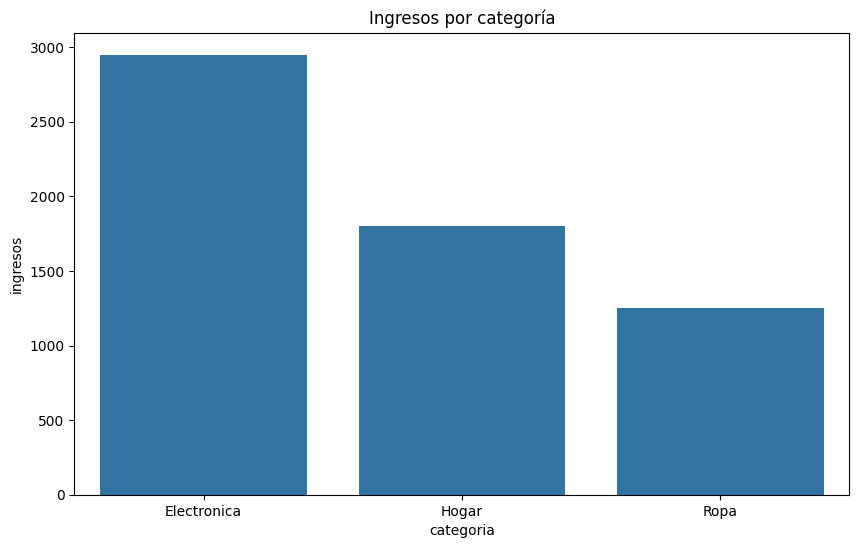

In [79]:
# Gráfico de ingresos por categoría.
plt.figure(figsize = (10, 6))
plt.title("Ingresos por categoría")
sns.barplot(results['ingresos'])

### Filtrar datos del 2024.

In [80]:
# Filtrar ventas del 2024 y guardar en una variable.
filtro_2024_df = ventas_df[ventas_df['fecha_venta'].between('2024-01-01', '2024-12-31')]

# Ver resultados.
filtro_2024_df

,producto_id,cantidad,fecha_venta,nombre,categoria,precio,ingresos,num_ventas
1,1,6,2024-01-12,Producto A,Electronica,100,600,1
3,2,4,2024-02-18,Producto B,Electronica,150,600,1
5,3,9,2024-03-22,Producto C,Ropa,50,450,1
7,4,2,2024-04-28,Producto D,Ropa,80,160,1
9,5,8,2024-05-31,Producto E,Hogar,120,960,1


In [81]:
# Calcular ingresos totales y en el 2024.
i_tot = ventas_df['ingresos'].sum()
i_2024 = filtro_2024_df['ingresos'].sum()

# Imprmir comparación.
print("Ingresos en el 2024: {}\nIngresos totales: {}\nDiferencia: {}".format(i_2024, i_tot, abs(i_2024 - i_tot)))

Ingresos en el 2024: 2770
Ingresos totales: 6000
Diferencia: 3230


### Estadísticas descriptivas para las ventas del 2024.

In [82]:
# Media, mediana y desviación estándar de los ingresos por categoría del año 2024.
filtro_2024_df.groupby(['categoria']).ingresos.agg(['mean', 'median', 'std'])

,mean,median,std
categoria,,,
Electronica,600.0,600.0,0.000000
Hogar,960.0,960.0,NaN
Ropa,305.0,305.0,205.060967


In [83]:
# Rango de los ingresos.
filtro_2024_df[['ingresos']].rank(method = 'first')

,ingresos
1,3.0
3,4.0
5,2.0
7,1.0
9,5.0


In [84]:
# Moda de los ingresos.
filtro_2024_df[['ingresos']].mode()

,ingresos
0,600


<Axes: title={'center': 'Ingresos por categoría para el año 2024'}, xlabel='categoria', ylabel='ingresos'>

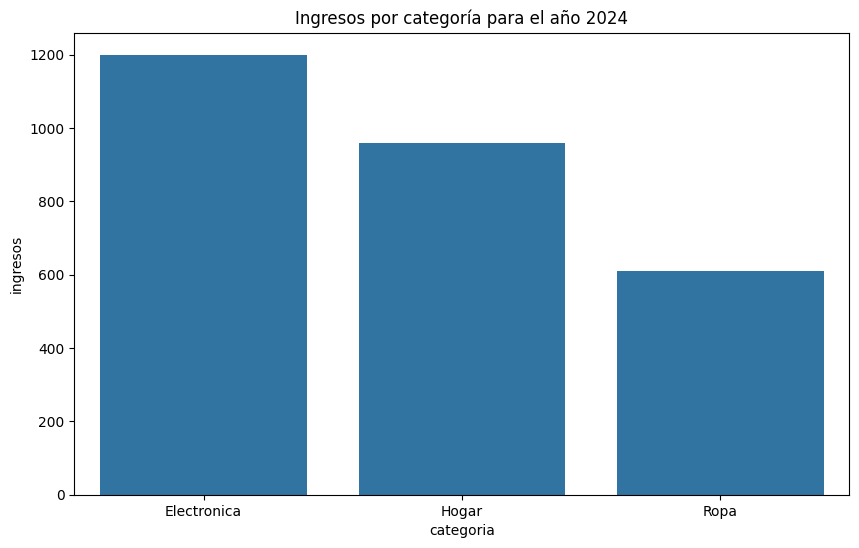

In [85]:
# Agrupar los ingresos por categoría y hacer la suma.
tmp = filtro_2024_df[['ingresos', 'categoria']].groupby('categoria').sum()
# Crear gráfico de barras de los ingresos por categoría.
plt.figure(figsize = (10, 6))
plt.title("Ingresos por categoría para el año 2024")
sns.barplot(tmp['ingresos'], )

<Axes: title={'center': 'Ingresos por año'}, xlabel='año_venta', ylabel='ingresos'>

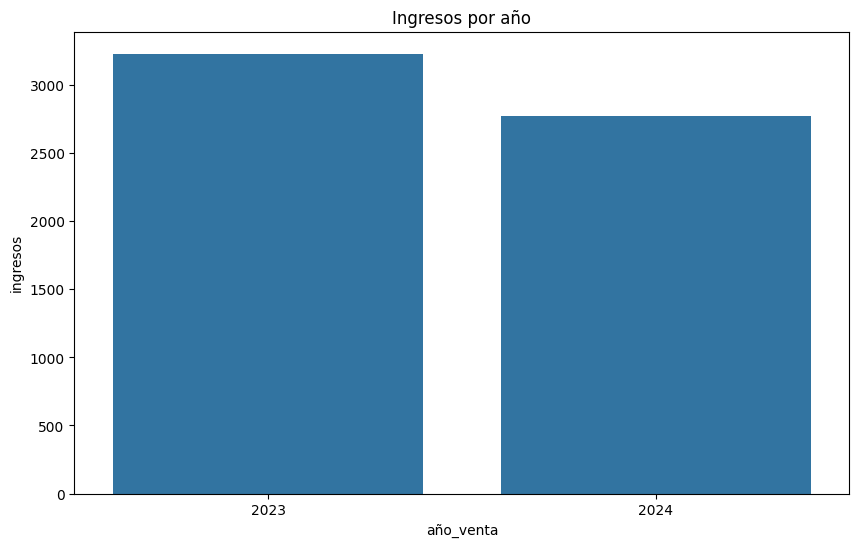

In [86]:
# Crear dataframe temporal.
tmp = ventas_df
# Añadir una columna de año al dataframe temporal.
tmp['año_venta'] = tmp.apply(lambda row: "2024" if row.fecha_venta.startswith("2024") else "2023", axis = 1)
# Agrupar los ingresos por año.
tmp = tmp[['ingresos', 'año_venta']].groupby('año_venta').sum()
# Crear gráfico de barras de ingresos por año.
plt.figure(figsize = (10, 6))
plt.title("Ingresos por año")
sns.barplot(tmp['ingresos'], )

<Axes: title={'center': 'Ingresos por producto'}, xlabel='nombre', ylabel='ingresos'>

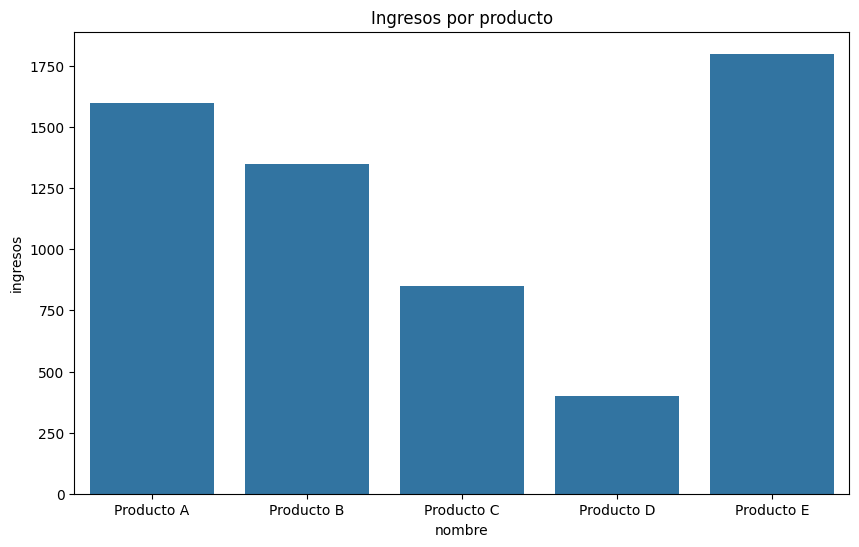

In [87]:
# Crear dataframe temporal.
tmp = ventas_df
# Agrupar los ingresos por producto.
tmp = tmp[['ingresos', 'nombre']].groupby('nombre').sum()
# Crear gráfico de barras de ingresos por producto.
plt.figure(figsize = (10, 6))
plt.title("Ingresos por producto")
sns.barplot(tmp['ingresos'], )

### Exportar archivos.

In [88]:
# Crear nombres de archivo.
file_dir = "results"
file_names = ['/ventas_combinadas.csv', '/ingresos_por_categoria.xlsx']
file_names = [file_dir + name for name in file_names]

# Verificar la existencia del archivo/carpeta.
def already_exists(file_path, file_dir):
    # Si el directorio no existe, crearlo.
    if os.path.exists(file_dir) is False:
        os.mkdir(file_dir)
        print("Se creó una carpeta nueva llamada '{}' para almacenar los resultados.\n".format(file_dir))
    msg = "El archivo '{}' ya existe, por lo que se reescribirá con los datos nuevos.".format(file_path)
    # Si el archivo existe, imprimir mensaje de reescritura, de lo contrario imprimir que se está creando el archivo.
    print(msg if os.path.exists(file_path) is True else "Creando archivo...")

# Por archivo en arreglo de nombre de archivos.
for file_path in file_names:
    # Revisar si ya existen el archivo y carpeta.
    already_exists(file_path, file_dir)
    # Usar el método de conversión correspondiente a la extensión del archivo.
    if "csv" in file_path:
        ventas_df.to_csv(path_or_buf = file_path)
    else:
        results.to_excel(file_path)
        # Imprimir mensaje de operación exitosa.
    print("Se creó el archivo '{}' con éxito\n".format(file_path))

Se creó una carpeta nueva llamada 'results' para almacenar los resultados.

Creando archivo...
Se creó el archivo 'results/ventas_combinadas.csv' con éxito

Creando archivo...
Se creó el archivo 'results/ingresos_por_categoria.xlsx' con éxito

